In [1]:
#library imports
import pandas as pd
import plotly.express as px
import json
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Load datasets

# The original datasets are using a semicolon (;) instead of a comma (,) as a delimiter. 
# To load the CSV file correctly, the delimiter is specified in the 'pd.read_csv()' function.

rnew_elec = pd.read_csv('Totaal bekende hernieuwbare elektriciteit - Gemeenten.csv', delimiter=';')
rnew_heat = pd.read_csv('Totaal bekende hernieuwbare warmte - Gemeenten.csv', delimiter=';')


## Format datasets

# The original datasets specify the columns using data information and year: 
# 'Totaal bekende hernieuwbare elektriciteit|2010'. In order to have a clear and readable dataset,
# these names are changed to only the year using the .split() method to split the name at the '|' character.

# Extract the year from the column names for rnew_elec
new_columns_elec = [col.split('|')[-1] for col in rnew_elec.columns]

# Extract the year from the column names for rnew_heat
new_columns_heat = [col.split('|')[-1] for col in rnew_heat.columns]

# Assign the new column names to the Data Sets
rnew_elec.columns = new_columns_elec
rnew_heat.columns = new_columns_heat

rnew_elec_filtered = rnew_elec
rnew_heat_filtered = rnew_heat

In [3]:
cbs_georef_2023 = gpd.read_file("bestuurlijkegrenzen.gpkg")

## Format data

# Filter the data so we only have the columns of the 'gem_name' and 'geometry'
cbs_georef_2023_filtered = cbs_georef_2023[['gemeentenaam', 'geometry']]

# Change the name of the 'gem_name' column to 'Gemeenten' in order to be consistent across datasets
cbs_georef_2023_filtered = cbs_georef_2023_filtered.rename(columns={'gemeentenaam': 'Gemeenten'})
cbs_georef_2023_filtered


# Since one datasets consists of 342 lines and the other of 352 we have to compare these two sets.
# This is done by creating a new dataset where the 'Gemeenten' value is not found in the 'Gemeenten' column of the 'rnew_elec' dataframe. 
# In other words, it finds the 'Gemeenten' values that are present in the GeoPackage file ('cbs_georef_2023_filtered') 
# but not in the CSV files ('rnew_heat_filtered', rnew_elec_filtered). And vice versa.

missing_in_rnew_elec = cbs_georef_2023_filtered.loc[~cbs_georef_2023_filtered['Gemeenten'].isin(rnew_elec_filtered['Gemeenten'])]
print(missing_in_rnew_elec['Gemeenten'])

missing_in_cbs_georef_2023_filtered = rnew_elec_filtered.loc[~rnew_elec_filtered['Gemeenten'].isin(cbs_georef_2023_filtered['Gemeenten'])]
print(missing_in_cbs_georef_2023_filtered['Gemeenten'])

8                    Cuijk
15                   Grave
30          Hellevoetsluis
34                    Uden
39                 Landerd
44               Langedijk
89           Sint Anthonis
94                 Boxmeer
126             Westvoorne
131                Brielle
157          Heerhugowaard
192    Mill en Sint Hubert
227            Bergen (NH)
231          's-Gravenhage
256            Hengelo (O)
266               Beemster
327             Bergen (L)
344                  Weesp
Name: Gemeenten, dtype: object
29        Bergen (L.)
30       Bergen (NH.)
65           Den Haag
70      Dijk en Waard
128           Hengelo
154    Land van Cuijk
174         Maashorst
299    Voorne aan Zee
Name: Gemeenten, dtype: object


In [4]:
# Setting 'Gemeenten' as index for all datasets : 'rnew_elec_filtered', 'rnew_heat_filtered', 'cbs_georef_2023_filtered'
# This is done to rename and drop certain rows based on municipality names.

cbs_georef_2023_filtered.set_index('Gemeenten', inplace=True)
rnew_elec_filtered.set_index('Gemeenten', inplace=True)
rnew_heat_filtered.set_index('Gemeenten', inplace=True)

In [5]:
# After comparing the two datasets, it can be concluded that some names overlap and some are former municipalities. 
# Therefore the overlapping names are changed and the former municipalities are removed from the Geopackage file.
# Furthermore, some very new municipalities are not included in both datasets. Since these municipalities are part of other
# in the datasets they will be removed for now to be consistent. 

# Renaming overlapping names
cbs_georef_renamed = cbs_georef_2023_filtered.rename(index={'Cuijk': 'Land van Cuijk', 
                                                            'Bergen (L)' : 'Bergen (L.)', 
                                                            'Bergen (NH)' : 'Bergen (NH.)', 
                                                            "'s-Gravenhage" : 'Den Haag', 
                                                            'Westvoorne' : 'Voorne aan Zee', 
                                                            'Hengelo (O)': 'Hengelo'}
                                                            )

# Drop former and very new municipalities

# List of former municipalities that will be removed from the geopackage dataset
to_remove_cbs_georef = ['Heerhugowaard', 
             'Mill en Sint Hubert', 
             'Beemster', 
             'Weesp', 
             'Brielle', 
             'Boxmeer', 
             'Sint Anthonis', 
             'Langedijk', 
             'Landerd', 
             'Uden', 
             'Hellevoetsluis', 
             'Grave'
            ]

# List of very new municipalities that will be removed from the renewable energy source datasets
to_remove_rnew_elec = ['Maashorst', 
                       'Dijk en Waard'
                     ]

to_remove_rnew_heat = ['Maashorst', 
                       'Dijk en Waard'
                     ]

# Removing the rows
cbs_georef_final = cbs_georef_renamed.drop(to_remove_cbs_georef, axis=0)
rnew_elec_final = rnew_elec_filtered.drop(to_remove_rnew_elec, axis=0)
rnew_heat_final = rnew_heat_filtered.drop(to_remove_rnew_elec, axis=0)

# Order the sets in alphabetical order
cbs_georef_final = cbs_georef_final.sort_index()
rnew_elec_final = rnew_elec_final.sort_index()
rnew_heat_final = rnew_heat_final.sort_index()

# Show final datasets
display(rnew_elec_final)
display(cbs_georef_final)
display(rnew_heat_final)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gemeenten,,,,,,,,,,,,
's-Hertogenbosch,1,32,64,65,65,67,61,73,99,152,244,337
Aa en Hunze,1,2,5,9,14,19,24,30,44,59,93,290
Aalsmeer,0,0,1,3,5,7,10,14,24,33,52,85
Aalten,106,112,113,108,120,129,114,123,144,156,190,197
Achtkarspelen,6,6,7,8,11,13,16,21,52,83,98,108
...,...,...,...,...,...,...,...,...,...,...,...,...
Zundert,0,0,1,3,5,8,11,14,22,33,53,67
Zutphen,31,33,33,33,39,43,45,47,69,75,115,163
Zwartewaterland,0,0,1,3,4,7,11,17,35,49,69,81


,geometry
Gemeenten,
's-Hertogenbosch,"MULTIPOLYGON (((151881.887 408505.532, 151713...."
Aa en Hunze,"MULTIPOLYGON (((245083.320 543741.444, 245080...."
Aalsmeer,"MULTIPOLYGON (((109660.992 470038.846, 109629...."
Aalten,"MULTIPOLYGON (((229776.426 430048.980, 229771...."
Achtkarspelen,"MULTIPOLYGON (((203965.712 573885.083, 203862...."
...,...
Zundert,"MULTIPOLYGON (((95698.840 382354.027, 95690.59..."
Zutphen,"MULTIPOLYGON (((212177.860 455942.641, 212172...."
Zwartewaterland,"MULTIPOLYGON (((206472.922 507757.734, 206461...."


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gemeenten,,,,,,,,,,,,
's-Hertogenbosch,150,178,197,195,192,189,167,164,157,181,213,234
Aa en Hunze,70,72,75,74,75,97,90,85,81,81,80,78
Aalsmeer,41,42,42,42,42,42,41,42,42,41,41,42
Aalten,55,56,55,55,55,54,54,53,53,53,51,52
Achtkarspelen,69,70,145,120,87,85,82,94,95,106,100,93
...,...,...,...,...,...,...,...,...,...,...,...,...
Zundert,54,55,53,54,53,53,52,52,52,51,60,55
Zutphen,38,39,38,38,38,38,37,37,37,37,38,38
Zwartewaterland,37,38,37,37,37,37,37,36,37,116,120,120


In [7]:
# Merge datasets
merged_georef_rnew_elec = rnew_elec_final.merge(cbs_georef_final, on='Gemeenten', how='left')
merged_georef_rnew_heat = rnew_heat_final.merge(cbs_georef_final, on='Gemeenten', how='left')

display(merged_georef_rnew_elec)
display(merged_georef_rnew_heat)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,geometry
Gemeenten,,,,,,,,,,,,,
's-Hertogenbosch,1,32,64,65,65,67,61,73,99,152,244,337,"MULTIPOLYGON (((151881.887 408505.532, 151713...."
Aa en Hunze,1,2,5,9,14,19,24,30,44,59,93,290,"MULTIPOLYGON (((245083.320 543741.444, 245080...."
Aalsmeer,0,0,1,3,5,7,10,14,24,33,52,85,"MULTIPOLYGON (((109660.992 470038.846, 109629...."
Aalten,106,112,113,108,120,129,114,123,144,156,190,197,"MULTIPOLYGON (((229776.426 430048.980, 229771...."
Achtkarspelen,6,6,7,8,11,13,16,21,52,83,98,108,"MULTIPOLYGON (((203965.712 573885.083, 203862...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zundert,0,0,1,3,5,8,11,14,22,33,53,67,"MULTIPOLYGON (((95698.840 382354.027, 95690.59..."
Zutphen,31,33,33,33,39,43,45,47,69,75,115,163,"MULTIPOLYGON (((212177.860 455942.641, 212172...."
Zwartewaterland,0,0,1,3,4,7,11,17,35,49,69,81,"MULTIPOLYGON (((206472.922 507757.734, 206461...."


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,geometry
Gemeenten,,,,,,,,,,,,,
's-Hertogenbosch,150,178,197,195,192,189,167,164,157,181,213,234,"MULTIPOLYGON (((151881.887 408505.532, 151713...."
Aa en Hunze,70,72,75,74,75,97,90,85,81,81,80,78,"MULTIPOLYGON (((245083.320 543741.444, 245080...."
Aalsmeer,41,42,42,42,42,42,41,42,42,41,41,42,"MULTIPOLYGON (((109660.992 470038.846, 109629...."
Aalten,55,56,55,55,55,54,54,53,53,53,51,52,"MULTIPOLYGON (((229776.426 430048.980, 229771...."
Achtkarspelen,69,70,145,120,87,85,82,94,95,106,100,93,"MULTIPOLYGON (((203965.712 573885.083, 203862...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zundert,54,55,53,54,53,53,52,52,52,51,60,55,"MULTIPOLYGON (((95698.840 382354.027, 95690.59..."
Zutphen,38,39,38,38,38,38,37,37,37,37,38,38,"MULTIPOLYGON (((212177.860 455942.641, 212172...."
Zwartewaterland,37,38,37,37,37,37,37,36,37,116,120,120,"MULTIPOLYGON (((206472.922 507757.734, 206461...."


In [27]:
# Setting up the requirements for the Heatmap

# Setting up the boundaries of the Netherlands
netherlands_boundary = gpd.read_file('Netherlands Boundaries/NLD_adm0.shp')
    
# Converting the CSV files to a GeoDataFrames
merged_georef_rnew_heat_gdf = gpd.GeoDataFrame(merged_georef_rnew_heat, geometry='geometry')
merged_georef_rnew_elec_gdf = gpd.GeoDataFrame(merged_georef_rnew_elec, geometry='geometry')

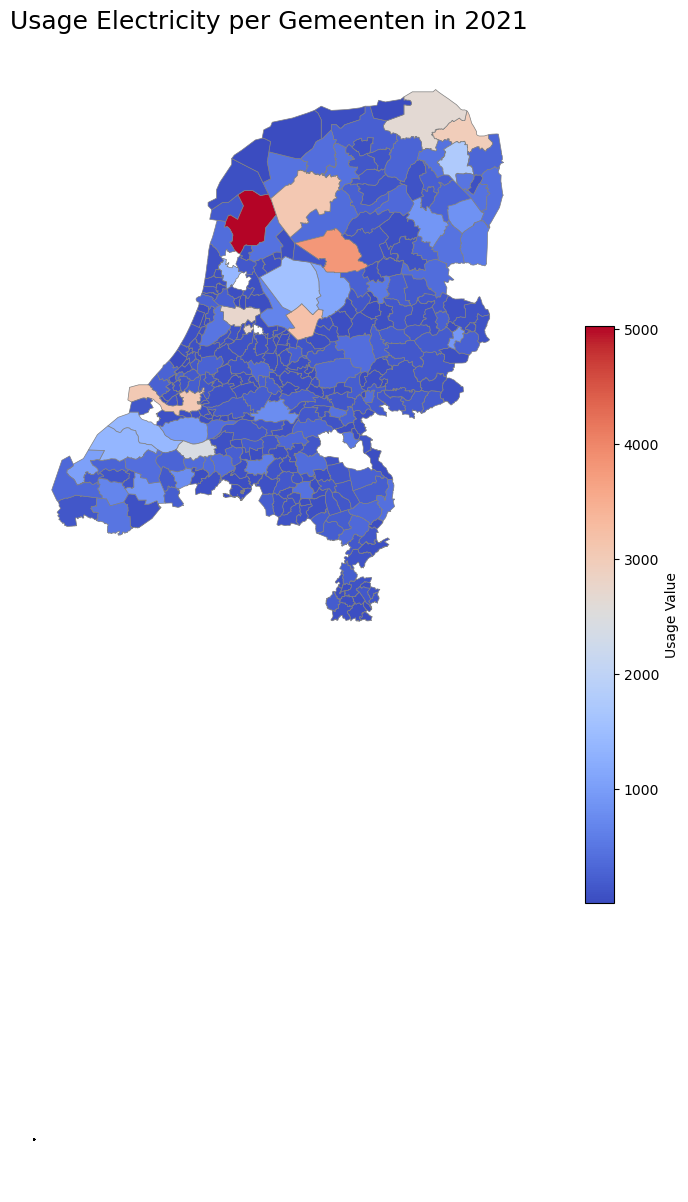

In [60]:
# Constructing the figure for heat usage per municipality

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the boundaries of Netherlands for context
netherlands_boundary.boundary.plot(ax=ax, linewidth=1.5, color="black")

# Plot the gemeenten choropleth map using the Electricity usage data in '2021' column for coloring
merged_georef_rnew_elec_gdf.plot(column='2021', 
         cmap='coolwarm', 
         linewidth=0.5, 
         ax=ax, 
         edgecolor='0.5', 
         legend=True, 
          legend_kwds={'shrink': 0.5, 
                       'label': "Usage Value"
                      }
         )

# Adjusting title and other visual aspects
ax.set_title("Usage Electricity per Gemeenten in 2021", fontdict={'fontsize': '18', 'fontweight' : '3'})
ax.axis('off')
plt.show()

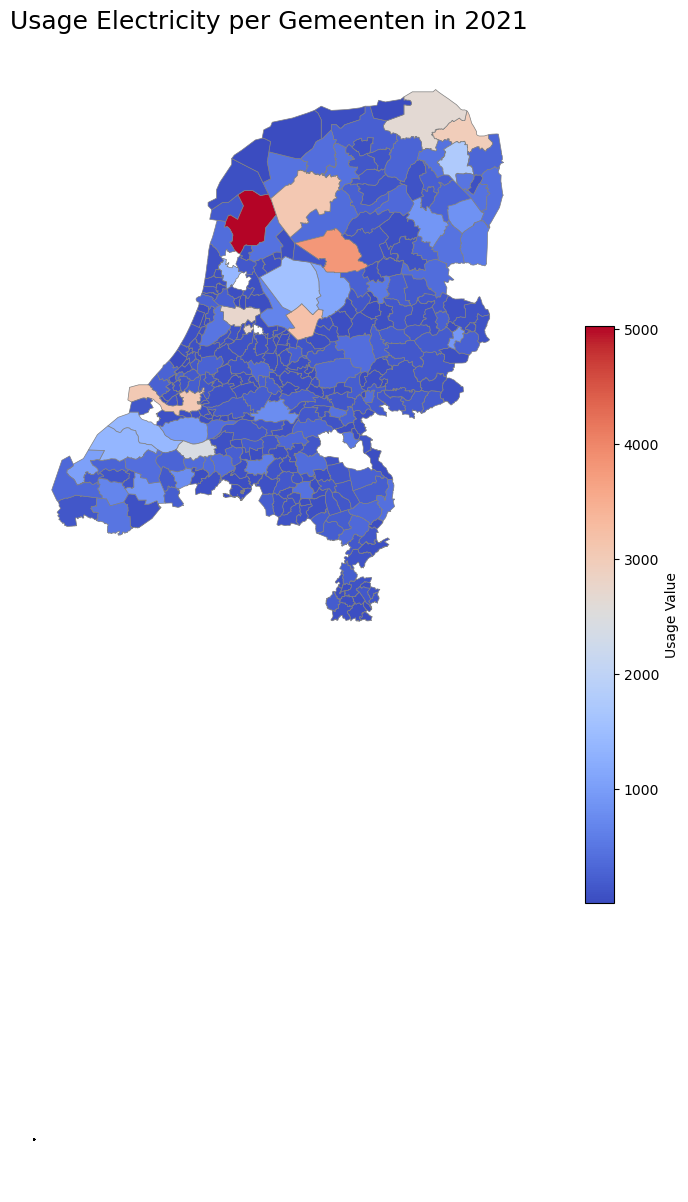

In [57]:
# Constructing the figure for electricity usage per municipality

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the boundaries of Netherlands for context
netherlands_boundary.boundary.plot(ax=ax, linewidth=1.5, color="black")

# Plot the gemeenten choropleth map using the Electricity usage data in '2021' column for coloring
merged_georef_rnew_elec_gdf.plot(column='2021', 
         cmap='coolwarm', 
         linewidth=0.5, 
         ax=ax, 
         edgecolor='0.5', 
         legend=True, 
          legend_kwds={'shrink': 0.5, 
                       'label': "Usage Value"
                      }
         )

# Adjusting title and other visual aspects
ax.set_title("Usage Electricity per Gemeenten in 2021", fontdict={'fontsize': '18', 'fontweight' : '3'})
ax.axis('off')
plt.show()

